# **Data Cleaning**

## Objectives

* Convert values of zero in RestingBP and Cholesterol to NaN
* Use an imputer to fill in the missing values
* Split the data into train and test sets

## Inputs

* outputs/datasets/collection/HeartDiseasePrediction.csv

## Outputs

* Cleaned train and test datasets
* path to train set here
* path to test set here

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/home/jfpaliga/CVD-predictor/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/home/jfpaliga/CVD-predictor'

# Load Data

Load the dataset from the data collection notebook

In [28]:
import pandas as pd
df = pd.read_csv("outputs/datasets/collection/HeartDiseasePrediction.csv")
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,low diabetes risk,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,low diabetes risk,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,low diabetes risk,ST,98,N,0.0,Up,0


---

# Data Cleaning

From our exploratory data analysis there were no missing values observed, however there were two features that contained zero values where a zero value made no sense ie it was assumed that no data had been collected.

* RestingBP - 1 zero (0.1% of data)
* Cholesterol - 172 zeros (18.7% of data)

The RestingBP only has one zero value so we could just drop the row. Rather than losing the data, however, we can just impute the zero value with the median value as there was no strong correlation of RestingBP with the target, HeartDisease.

First, before any imputation, we need to convert the zeros in RestingBP and Cholesterol into NaN.

In [41]:
import numpy as np

zero_to_nan_df = df
for col in ["RestingBP", "Cholesterol"]:
    zero_to_nan_df[col] = zero_to_nan_df[col].replace(0, np.nan)

def EvaluateMissingData(df):
    missing_data_absolute = df.isna().sum()
    missing_data_percentage = round(missing_data_absolute/len(df)*100, 2)
    df_missing_data = (pd.DataFrame(
                            data={"RowsWithMissingData": missing_data_absolute,
                                   "PercentageOfDataset": missing_data_percentage,
                                   "DataType": df.dtypes}
                                    )
                          .sort_values(by=['PercentageOfDataset'], ascending=False)
                          .query("PercentageOfDataset > 0")
                          )

    return df_missing_data

EvaluateMissingData(zero_to_nan_df)

,RowsWithMissingData,PercentageOfDataset,DataType
Cholesterol,172,18.74,float64
RestingBP,1,0.11,float64


Now, the NaN values can be replaced with imputed values.

* For RestingBP, we will use a median imputation method.
* For Cholesterol, we will use a random sample imputation method as shown in the EDA.

In [42]:
from sklearn.pipeline import Pipeline
from feature_engine.imputation import MeanMedianImputer, RandomSampleImputer

pipeline = Pipeline([
    ( "median_imputation", MeanMedianImputer(imputation_method="median",
                                             variables=["RestingBP"])),
    ( "random_sample_imputation", RandomSampleImputer(random_state=1,
                                                      seed='general',
                                                      variables=["Cholesterol"]))
])

cleaned_df = pipeline.fit_transform(zero_to_nan_df)
EvaluateMissingData(cleaned_df)

,RowsWithMissingData,PercentageOfDataset,DataType


Next, we assess the difference on the dataset after cleaning to see if the methods selected had any impact on the distributions of the cleaned features.


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['RestingBP', 'Cholesterol'] 




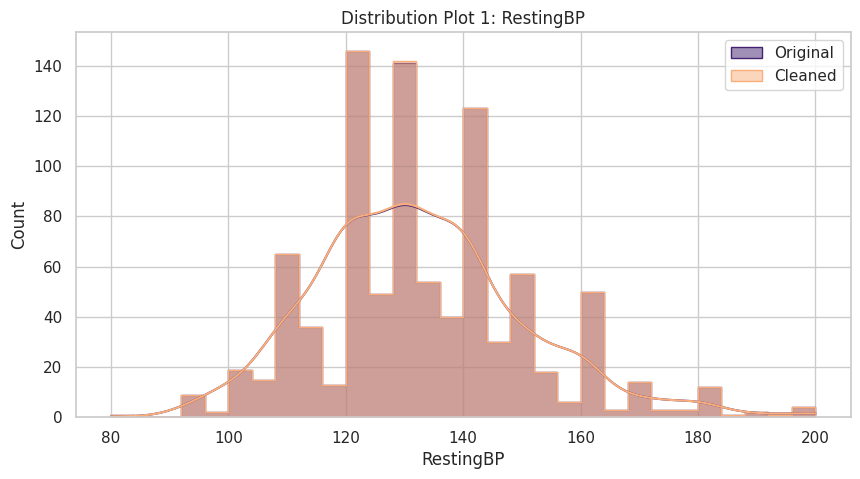

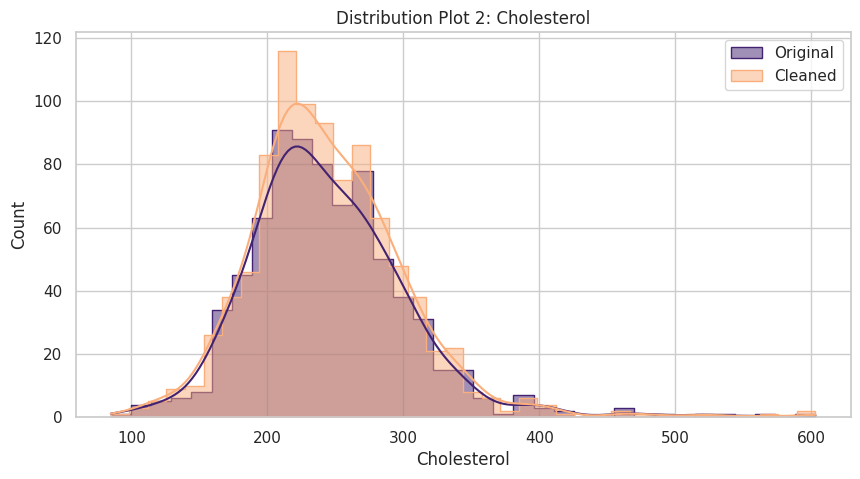

In [43]:
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

def DataCleaningEffect(df_original,df_cleaned,variables_applied_with_method):

  flag_count=1 # Indicate plot number
  
  # distinguish between numerical and categorical variables
  categorical_variables = df_original.select_dtypes(exclude=['number']).columns 

  # scan over variables, 
    # first on variables that you applied the method
    # if the variable is a numerical plot, a histogram if categorical plot a barplot
  for set_of_variables in [variables_applied_with_method]:
    print("\n=====================================================================================")
    print(f"* Distribution Effect Analysis After Data Cleaning Method in the following variables:")
    print(f"{set_of_variables} \n\n")
  

    for var in set_of_variables:
      if var in categorical_variables:  # it is categorical variable: barplot
        
        df1 = pd.DataFrame({"Type":"Original","Value":df_original[var]})
        df2 = pd.DataFrame({"Type":"Cleaned","Value":df_cleaned[var]})
        dfAux = pd.concat([df1, df2], axis=0)
        fig , axes = plt.subplots(figsize=(15, 5))
        sns.countplot(hue='Type', data=dfAux, x="Value",palette=['#432371',"#FAAE7B"])
        axes.set(title=f"Distribution Plot {flag_count}: {var}")
        plt.xticks(rotation=90)
        plt.legend() 

      else: # it is numerical variable: histogram

        fig , axes = plt.subplots(figsize=(10, 5))
        sns.histplot(data=df_original, x=var, color="#432371", label='Original', kde=True,element="step", ax=axes)
        sns.histplot(data=df_cleaned, x=var, color="#FAAE7B", label='Cleaned', kde=True,element="step", ax=axes)
        axes.set(title=f"Distribution Plot {flag_count}: {var}")
        plt.legend() 

      plt.show()
      flag_count+= 1


cleaned_features = ["RestingBP", "Cholesterol"]
DataCleaningEffect(df, cleaned_df, cleaned_features)

From the above plots, it can be observed that there was no impact on distribution.

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
